# Practica 4: Perceptron 
El programa consiste de la implementacion de un perceptron el cual puede clasificar datos que son linealmente separables.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [28]:
class perceptron():
    
    def __init__(self):
        self.w = None
        self.b = None
        self.f = None
        self.o = None
        self.stats = dict()

    def setWeights(self, w):
        self.w = w

    def setBias(self, b):
        self.b = b

    def setAFunction(self, f):
        if f == 'hardlim':
            self.f = lambda x: 0 if x<0 else 1
        elif f == 'hardlims':
            self.f = lambda x: -1 if x<0 else 1
        elif f == 'purelin':
            self.f = lambda x: x
        elif f == 'logsigmoid':
            self.f = lambda x: 1/(1+np.exp(-x))

    def output(self, n):
        self.o = self.f(n)

    def fit(self, X, Y):
        e = 1                 # Error
        eVector = []          # Vector de error
        eCount = 0            # Cuenta de error (incrementa cuando e=0)
        itCount = 0           # Numero de iteraciones
        itLimit = 9999        # Maximo de iteraciones
        k = 0                 # Indice de los vectores X e Y
        # El ciclo while termina cuando:
        # 1. El error es 0 para todos los vectores de entrenamiento en X
        # 2. Se ha llegado al maximo de iteraciones
        while True:
            if eCount == X.shape[0]:           
                break
            if itCount == itLimit:
                print('El perceptron no converge a una solucion...')
                break
            # Paso 1: Obtener la salida del perceptron -> wx+b
            self.output(np.dot(self.w, X[k]) + self.b)
            # Paso 2: Calcular el error
            e = Y[k] - self.o
            eVector.append(e)
            # Paso 3: Actualizar el vector de pesos y el bias
            if e == 0:
                eCount += 1
            else:
                # Si hay un error, reiniciar el contador a 0
                if eCount > 0:
                    eCount = 0
                self.w = self.w + e*X[k]
                self.b = self.b + e
            # Actualizar el indice 
            if k == X.shape[0]-1:
                k = 0
            else:
                k += 1
            itCount += 1
            # Impresion de ajuste de pesos
            print('Iteracion = ', itCount)
            print('Pesos = ', self.w)
            print('Bias = ', self.b)
            print('Error = ', e)
            print('')

        self.stats['steps'] = itCount
        self.stats['error'] = e
        self.stats['eVector'] = eVector

## Ejercicio 0 
Los datos son linealmente separables por lo que el perceptron converge a una solucion.

In [29]:
# Datos ejercicio 0
x0 = np.array([-1,2,-3,3])
y0 = np.array([2,3,-4,-2]) 
X0 = np.vstack((x0,y0)).ravel(order='F').reshape(4,2)
t0 = np.array([1,1,0,0])

In [30]:
# Creacion del perceptron
p0 = perceptron()
p0.setWeights(np.array([-1,-1]))
p0.setBias(0)
p0.setAFunction('hardlim')

In [31]:
# Entrenamiento del perceptron
p0.fit(X0, t0)
print('Pesos finales: ', p0.w)
print('Bias final: ', p0.b)

Iteracion =  1
Pesos =  [-2  1]
Bias =  1
Error =  1

Iteracion =  2
Pesos =  [-2  1]
Bias =  1
Error =  0

Iteracion =  3
Pesos =  [1 5]
Bias =  0
Error =  -1

Iteracion =  4
Pesos =  [1 5]
Bias =  0
Error =  0

Iteracion =  5
Pesos =  [1 5]
Bias =  0
Error =  0

Iteracion =  6
Pesos =  [1 5]
Bias =  0
Error =  0

Iteracion =  7
Pesos =  [1 5]
Bias =  0
Error =  0

Pesos finales:  [1 5]
Bias final:  0


In [32]:
# Definicion del vector x 
x = np.linspace(-8,8, 100)

In [33]:
# Definicion de la recta que dividide los datos del ejercicio 0
z0 = -1/5*x

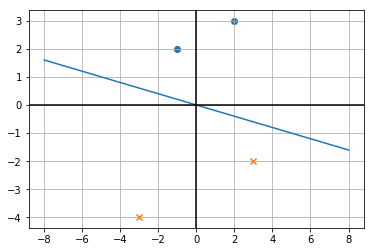

In [34]:
fig = plt.figure()
plt.scatter(x0[:2],y0[:2], marker='o')
plt.scatter(x0[2:],y0[2:], marker='x')
plt.plot(x, z0)
plt.axhline(0, color='k')
plt.axvline(0, color='k')
plt.grid(True)
plt.show()

## Ejercicio 1
Los datos tambien son linealmente separables, los pesos y el bias son inicializados aleatoriamente y el perceptron converge a una solucion.

In [35]:
# Datos ejercicio 1
x1 = np.array([2,0,7,4,1,-3,-2,-5,-6,-6,5,1,3,1,2,-4,-3,-6,6])
y1 = np.array([1,3,2,5,8,4,-1.5,1,-1,5,-2,-3,-5,-6,-7,-5,-7,-8,-8])
X1 = np.vstack((x1,y1)).ravel(order='F').reshape(19,2)
t1 = np.array([1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0])

In [36]:
p1 = perceptron()
p1.setBias(np.random.randint(-5,5))
p1.setWeights(np.array(np.random.randint(-5,5,size=(1,2))))
p1.setAFunction('hardlim')

In [37]:
print('Pesos iniciales : ', p1.w)
print('Bias inicial : ', p1.b)

Pesos iniciales :  [[-1  1]]
Bias inicial :  3


In [38]:
# Entrenamiento del perceptron
p1.fit(X1,t1)
print('Pesos finales: ', p1.w)
print('Bias final: ', p1.b)

Iteracion =  1
Pesos =  [[-1  1]]
Bias =  3
Error =  0

Iteracion =  2
Pesos =  [[-1  1]]
Bias =  3
Error =  0

Iteracion =  3
Pesos =  [[6. 3.]]
Bias =  4
Error =  1

Iteracion =  4
Pesos =  [[6. 3.]]
Bias =  4
Error =  0

Iteracion =  5
Pesos =  [[6. 3.]]
Bias =  4
Error =  0

Iteracion =  6
Pesos =  [[3. 7.]]
Bias =  5
Error =  1

Iteracion =  7
Pesos =  [[1.  5.5]]
Bias =  6
Error =  1

Iteracion =  8
Pesos =  [[1.  5.5]]
Bias =  6
Error =  0

Iteracion =  9
Pesos =  [[-5.   4.5]]
Bias =  7
Error =  1

Iteracion =  10
Pesos =  [[-5.   4.5]]
Bias =  7
Error =  0

Iteracion =  11
Pesos =  [[-5.   4.5]]
Bias =  7
Error =  0

Iteracion =  12
Pesos =  [[-5.   4.5]]
Bias =  7
Error =  0

Iteracion =  13
Pesos =  [[-5.   4.5]]
Bias =  7
Error =  0

Iteracion =  14
Pesos =  [[-5.   4.5]]
Bias =  7
Error =  0

Iteracion =  15
Pesos =  [[-5.   4.5]]
Bias =  7
Error =  0

Iteracion =  16
Pesos =  [[-1.   9.5]]
Bias =  6
Error =  -1

Iteracion =  17
Pesos =  [[-1.   9.5]]
Bias =  6
Error =  0


In [39]:
# Definicion de la recta que separa los datos del ejercicio 1
z1 = -p1.b/p1.w[0,1] - p1.w[0,0]/p1.w[0,1]*x

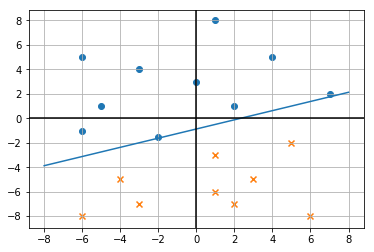

In [40]:
fig2 = plt.figure()
plt.scatter(x1[:10], y1[:10], marker='o')
plt.scatter(x1[10:], y1[10:], marker='x')
plt.plot(x, z1)
plt.axhline(0, color='k')
plt.axvline(0, color='k')
plt.grid(True)
plt.show()

## Ejercicio 2
Los datos no son linealmente separables por lo que el perceptron no converge a una solucion. 

Se presenta la grafica de la funcion de error para observar que no converge hacia 0.

Tambien se muestra una de las rectas que el perceptron determina por medio de sus pesos y el bias, los cuales son obtenidos despues de llegar al maximo de iteraciones (9999).

In [41]:
# Datos ejercicio 2
x2 = np.array([4,2,2,0,-2,-3,-4,-6,2,0,3,4,-2,4,7,-6,-4,-5])
y2 = np.array([5,4,8,2,9,3,7,9,1,0,-2,3,-4,-5,-7,-5,-8,2])
X2 = np.vstack((x2,y2)).ravel(order='F').reshape(18,2)
t2 = np.array([1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0])

In [42]:
p2 = perceptron()
p2.setBias(np.random.randint(-5,5))
p2.setWeights(np.array(np.random.randint(-5,5,size=(1,2))))
p2.setAFunction('hardlim')

In [43]:
p2.fit(X2, t2)

Iteracion =  1
Pesos =  [[2 2]]
Bias =  -5
Error =  0

Iteracion =  2
Pesos =  [[2 2]]
Bias =  -5
Error =  0

Iteracion =  3
Pesos =  [[2 2]]
Bias =  -5
Error =  0

Iteracion =  4
Pesos =  [[2 4]]
Bias =  -4
Error =  1

Iteracion =  5
Pesos =  [[2 4]]
Bias =  -4
Error =  0

Iteracion =  6
Pesos =  [[2 4]]
Bias =  -4
Error =  0

Iteracion =  7
Pesos =  [[2 4]]
Bias =  -4
Error =  0

Iteracion =  8
Pesos =  [[2 4]]
Bias =  -4
Error =  0

Iteracion =  9
Pesos =  [[0 3]]
Bias =  -5
Error =  -1

Iteracion =  10
Pesos =  [[0 3]]
Bias =  -5
Error =  0

Iteracion =  11
Pesos =  [[0 3]]
Bias =  -5
Error =  0

Iteracion =  12
Pesos =  [[-4  0]]
Bias =  -6
Error =  -1

Iteracion =  13
Pesos =  [[-2  4]]
Bias =  -7
Error =  -1

Iteracion =  14
Pesos =  [[-2  4]]
Bias =  -7
Error =  0

Iteracion =  15
Pesos =  [[-2  4]]
Bias =  -7
Error =  0

Iteracion =  16
Pesos =  [[-2  4]]
Bias =  -7
Error =  0

Iteracion =  17
Pesos =  [[-2  4]]
Bias =  -7
Error =  0

Iteracion =  18
Pesos =  [[3 2]]
Bias =  -

Iteracion =  174
Pesos =  [[-2  4]]
Bias =  -15
Error =  -1

Iteracion =  175
Pesos =  [[-2  4]]
Bias =  -15
Error =  0

Iteracion =  176
Pesos =  [[-2  4]]
Bias =  -15
Error =  0

Iteracion =  177
Pesos =  [[-2  4]]
Bias =  -15
Error =  0

Iteracion =  178
Pesos =  [[-2  4]]
Bias =  -15
Error =  0

Iteracion =  179
Pesos =  [[-2  4]]
Bias =  -15
Error =  0

Iteracion =  180
Pesos =  [[3 2]]
Bias =  -16
Error =  -1

Iteracion =  181
Pesos =  [[3 2]]
Bias =  -16
Error =  0

Iteracion =  182
Pesos =  [[5 6]]
Bias =  -15
Error =  1

Iteracion =  183
Pesos =  [[5 6]]
Bias =  -15
Error =  0

Iteracion =  184
Pesos =  [[5 8]]
Bias =  -14
Error =  1

Iteracion =  185
Pesos =  [[5 8]]
Bias =  -14
Error =  0

Iteracion =  186
Pesos =  [[ 2 11]]
Bias =  -13
Error =  1

Iteracion =  187
Pesos =  [[ 2 11]]
Bias =  -13
Error =  0

Iteracion =  188
Pesos =  [[ 2 11]]
Bias =  -13
Error =  0

Iteracion =  189
Pesos =  [[ 0 10]]
Bias =  -14
Error =  -1

Iteracion =  190
Pesos =  [[ 0 10]]
Bias =  -14
E

Bias =  -17
Error =  0

Iteracion =  341
Pesos =  [[-4  6]]
Bias =  -17
Error =  0

Iteracion =  342
Pesos =  [[1 4]]
Bias =  -18
Error =  -1

Iteracion =  343
Pesos =  [[1 4]]
Bias =  -18
Error =  0

Iteracion =  344
Pesos =  [[1 4]]
Bias =  -18
Error =  0

Iteracion =  345
Pesos =  [[1 4]]
Bias =  -18
Error =  0

Iteracion =  346
Pesos =  [[1 6]]
Bias =  -17
Error =  1

Iteracion =  347
Pesos =  [[1 6]]
Bias =  -17
Error =  0

Iteracion =  348
Pesos =  [[-2  9]]
Bias =  -16
Error =  1

Iteracion =  349
Pesos =  [[-2  9]]
Bias =  -16
Error =  0

Iteracion =  350
Pesos =  [[-2  9]]
Bias =  -16
Error =  0

Iteracion =  351
Pesos =  [[-2  9]]
Bias =  -16
Error =  0

Iteracion =  352
Pesos =  [[-2  9]]
Bias =  -16
Error =  0

Iteracion =  353
Pesos =  [[-2  9]]
Bias =  -16
Error =  0

Iteracion =  354
Pesos =  [[-6  6]]
Bias =  -17
Error =  -1

Iteracion =  355
Pesos =  [[-6  6]]
Bias =  -17
Error =  0

Iteracion =  356
Pesos =  [[-6  6]]
Bias =  -17
Error =  0

Iteracion =  357
Pesos =  

Pesos =  [[5 7]]
Bias =  -20
Error =  0

Iteracion =  508
Pesos =  [[5 9]]
Bias =  -19
Error =  1

Iteracion =  509
Pesos =  [[5 9]]
Bias =  -19
Error =  0

Iteracion =  510
Pesos =  [[ 2 12]]
Bias =  -18
Error =  1

Iteracion =  511
Pesos =  [[ 2 12]]
Bias =  -18
Error =  0

Iteracion =  512
Pesos =  [[ 2 12]]
Bias =  -18
Error =  0

Iteracion =  513
Pesos =  [[ 2 12]]
Bias =  -18
Error =  0

Iteracion =  514
Pesos =  [[ 2 12]]
Bias =  -18
Error =  0

Iteracion =  515
Pesos =  [[ 2 12]]
Bias =  -18
Error =  0

Iteracion =  516
Pesos =  [[-2  9]]
Bias =  -19
Error =  -1

Iteracion =  517
Pesos =  [[-2  9]]
Bias =  -19
Error =  0

Iteracion =  518
Pesos =  [[-2  9]]
Bias =  -19
Error =  0

Iteracion =  519
Pesos =  [[-2  9]]
Bias =  -19
Error =  0

Iteracion =  520
Pesos =  [[-2  9]]
Bias =  -19
Error =  0

Iteracion =  521
Pesos =  [[-2  9]]
Bias =  -19
Error =  0

Iteracion =  522
Pesos =  [[3 7]]
Bias =  -20
Error =  -1

Iteracion =  523
Pesos =  [[3 7]]
Bias =  -20
Error =  0

Itera

Error =  0

Iteracion =  674
Pesos =  [[0 8]]
Bias =  -20
Error =  0

Iteracion =  675
Pesos =  [[0 8]]
Bias =  -20
Error =  0

Iteracion =  676
Pesos =  [[0 8]]
Bias =  -20
Error =  0

Iteracion =  677
Pesos =  [[0 8]]
Bias =  -20
Error =  0

Iteracion =  678
Pesos =  [[-4  5]]
Bias =  -21
Error =  -1

Iteracion =  679
Pesos =  [[-4  5]]
Bias =  -21
Error =  0

Iteracion =  680
Pesos =  [[-4  5]]
Bias =  -21
Error =  0

Iteracion =  681
Pesos =  [[-4  5]]
Bias =  -21
Error =  0

Iteracion =  682
Pesos =  [[-4  5]]
Bias =  -21
Error =  0

Iteracion =  683
Pesos =  [[-4  5]]
Bias =  -21
Error =  0

Iteracion =  684
Pesos =  [[1 3]]
Bias =  -22
Error =  -1

Iteracion =  685
Pesos =  [[5 8]]
Bias =  -21
Error =  1

Iteracion =  686
Pesos =  [[5 8]]
Bias =  -21
Error =  0

Iteracion =  687
Pesos =  [[5 8]]
Bias =  -21
Error =  0

Iteracion =  688
Pesos =  [[ 5 10]]
Bias =  -20
Error =  1

Iteracion =  689
Pesos =  [[ 5 10]]
Bias =  -20
Error =  0

Iteracion =  690
Pesos =  [[ 2 13]]
Bias =

Bias =  -22
Error =  -1

Iteracion =  841
Pesos =  [[-2  6]]
Bias =  -22
Error =  0

Iteracion =  842
Pesos =  [[-2  6]]
Bias =  -22
Error =  0

Iteracion =  843
Pesos =  [[-2  6]]
Bias =  -22
Error =  0

Iteracion =  844
Pesos =  [[-2  6]]
Bias =  -22
Error =  0

Iteracion =  845
Pesos =  [[-2  6]]
Bias =  -22
Error =  0

Iteracion =  846
Pesos =  [[3 4]]
Bias =  -23
Error =  -1

Iteracion =  847
Pesos =  [[3 4]]
Bias =  -23
Error =  0

Iteracion =  848
Pesos =  [[5 8]]
Bias =  -22
Error =  1

Iteracion =  849
Pesos =  [[5 8]]
Bias =  -22
Error =  0

Iteracion =  850
Pesos =  [[ 5 10]]
Bias =  -21
Error =  1

Iteracion =  851
Pesos =  [[ 5 10]]
Bias =  -21
Error =  0

Iteracion =  852
Pesos =  [[ 2 13]]
Bias =  -20
Error =  1

Iteracion =  853
Pesos =  [[ 2 13]]
Bias =  -20
Error =  0

Iteracion =  854
Pesos =  [[ 2 13]]
Bias =  -20
Error =  0

Iteracion =  855
Pesos =  [[ 2 13]]
Bias =  -20
Error =  0

Iteracion =  856
Pesos =  [[ 2 13]]
Bias =  -20
Error =  0

Iteracion =  857
Pesos

Bias =  -23
Error =  -1

Iteracion =  1063
Pesos =  [[0 7]]
Bias =  -23
Error =  0

Iteracion =  1064
Pesos =  [[0 7]]
Bias =  -23
Error =  0

Iteracion =  1065
Pesos =  [[0 7]]
Bias =  -23
Error =  0

Iteracion =  1066
Pesos =  [[0 9]]
Bias =  -22
Error =  1

Iteracion =  1067
Pesos =  [[0 9]]
Bias =  -22
Error =  0

Iteracion =  1068
Pesos =  [[0 9]]
Bias =  -22
Error =  0

Iteracion =  1069
Pesos =  [[0 9]]
Bias =  -22
Error =  0

Iteracion =  1070
Pesos =  [[0 9]]
Bias =  -22
Error =  0

Iteracion =  1071
Pesos =  [[0 9]]
Bias =  -22
Error =  0

Iteracion =  1072
Pesos =  [[0 9]]
Bias =  -22
Error =  0

Iteracion =  1073
Pesos =  [[0 9]]
Bias =  -22
Error =  0

Iteracion =  1074
Pesos =  [[-4  6]]
Bias =  -23
Error =  -1

Iteracion =  1075
Pesos =  [[-4  6]]
Bias =  -23
Error =  0

Iteracion =  1076
Pesos =  [[-4  6]]
Bias =  -23
Error =  0

Iteracion =  1077
Pesos =  [[-4  6]]
Bias =  -23
Error =  0

Iteracion =  1078
Pesos =  [[-4  6]]
Bias =  -23
Error =  0

Iteracion =  1079
Pe

Error =  0

Iteracion =  1285
Pesos =  [[-1 10]]
Bias =  -23
Error =  0

Iteracion =  1286
Pesos =  [[-1 10]]
Bias =  -23
Error =  0

Iteracion =  1287
Pesos =  [[-1 10]]
Bias =  -23
Error =  0

Iteracion =  1288
Pesos =  [[-1 10]]
Bias =  -23
Error =  0

Iteracion =  1289
Pesos =  [[-1 10]]
Bias =  -23
Error =  0

Iteracion =  1290
Pesos =  [[-5  7]]
Bias =  -24
Error =  -1

Iteracion =  1291
Pesos =  [[-5  7]]
Bias =  -24
Error =  0

Iteracion =  1292
Pesos =  [[-5  7]]
Bias =  -24
Error =  0

Iteracion =  1293
Pesos =  [[-5  7]]
Bias =  -24
Error =  0

Iteracion =  1294
Pesos =  [[-5  7]]
Bias =  -24
Error =  0

Iteracion =  1295
Pesos =  [[-5  7]]
Bias =  -24
Error =  0

Iteracion =  1296
Pesos =  [[0 5]]
Bias =  -25
Error =  -1

Iteracion =  1297
Pesos =  [[0 5]]
Bias =  -25
Error =  0

Iteracion =  1298
Pesos =  [[2 9]]
Bias =  -24
Error =  1

Iteracion =  1299
Pesos =  [[2 9]]
Bias =  -24
Error =  0

Iteracion =  1300
Pesos =  [[ 2 11]]
Bias =  -23
Error =  1

Iteracion =  1301



Iteracion =  1507
Pesos =  [[-6  8]]
Bias =  -25
Error =  0

Iteracion =  1508
Pesos =  [[-6  8]]
Bias =  -25
Error =  0

Iteracion =  1509
Pesos =  [[-6  8]]
Bias =  -25
Error =  0

Iteracion =  1510
Pesos =  [[-6  8]]
Bias =  -25
Error =  0

Iteracion =  1511
Pesos =  [[-6  8]]
Bias =  -25
Error =  0

Iteracion =  1512
Pesos =  [[-1  6]]
Bias =  -26
Error =  -1

Iteracion =  1513
Pesos =  [[-1  6]]
Bias =  -26
Error =  0

Iteracion =  1514
Pesos =  [[ 1 10]]
Bias =  -25
Error =  1

Iteracion =  1515
Pesos =  [[ 1 10]]
Bias =  -25
Error =  0

Iteracion =  1516
Pesos =  [[ 1 12]]
Bias =  -24
Error =  1

Iteracion =  1517
Pesos =  [[ 1 12]]
Bias =  -24
Error =  0

Iteracion =  1518
Pesos =  [[ 1 12]]
Bias =  -24
Error =  0

Iteracion =  1519
Pesos =  [[ 1 12]]
Bias =  -24
Error =  0

Iteracion =  1520
Pesos =  [[ 1 12]]
Bias =  -24
Error =  0

Iteracion =  1521
Pesos =  [[ 1 12]]
Bias =  -24
Error =  0

Iteracion =  1522
Pesos =  [[ 1 12]]
Bias =  -24
Error =  0

Iteracion =  1523
Peso

Error =  1

Iteracion =  1715
Pesos =  [[ 2 10]]
Bias =  -26
Error =  0

Iteracion =  1716
Pesos =  [[-1 13]]
Bias =  -25
Error =  1

Iteracion =  1717
Pesos =  [[-1 13]]
Bias =  -25
Error =  0

Iteracion =  1718
Pesos =  [[-1 13]]
Bias =  -25
Error =  0

Iteracion =  1719
Pesos =  [[-1 13]]
Bias =  -25
Error =  0

Iteracion =  1720
Pesos =  [[-1 13]]
Bias =  -25
Error =  0

Iteracion =  1721
Pesos =  [[-1 13]]
Bias =  -25
Error =  0

Iteracion =  1722
Pesos =  [[-5 10]]
Bias =  -26
Error =  -1

Iteracion =  1723
Pesos =  [[-5 10]]
Bias =  -26
Error =  0

Iteracion =  1724
Pesos =  [[-5 10]]
Bias =  -26
Error =  0

Iteracion =  1725
Pesos =  [[-5 10]]
Bias =  -26
Error =  0

Iteracion =  1726
Pesos =  [[-5 10]]
Bias =  -26
Error =  0

Iteracion =  1727
Pesos =  [[-5 10]]
Bias =  -26
Error =  0

Iteracion =  1728
Pesos =  [[0 8]]
Bias =  -27
Error =  -1

Iteracion =  1729
Pesos =  [[0 8]]
Bias =  -27
Error =  0

Iteracion =  1730
Pesos =  [[0 8]]
Bias =  -27
Error =  0

Iteracion =  173

Pesos =  [[ 1 15]]
Bias =  -26
Error =  0

Iteracion =  1952
Pesos =  [[ 1 15]]
Bias =  -26
Error =  0

Iteracion =  1953
Pesos =  [[ 1 15]]
Bias =  -26
Error =  0

Iteracion =  1954
Pesos =  [[ 1 15]]
Bias =  -26
Error =  0

Iteracion =  1955
Pesos =  [[ 1 15]]
Bias =  -26
Error =  0

Iteracion =  1956
Pesos =  [[-3 12]]
Bias =  -27
Error =  -1

Iteracion =  1957
Pesos =  [[-3 12]]
Bias =  -27
Error =  0

Iteracion =  1958
Pesos =  [[-3 12]]
Bias =  -27
Error =  0

Iteracion =  1959
Pesos =  [[-3 12]]
Bias =  -27
Error =  0

Iteracion =  1960
Pesos =  [[-3 12]]
Bias =  -27
Error =  0

Iteracion =  1961
Pesos =  [[-3 12]]
Bias =  -27
Error =  0

Iteracion =  1962
Pesos =  [[ 2 10]]
Bias =  -28
Error =  -1

Iteracion =  1963
Pesos =  [[ 2 10]]
Bias =  -28
Error =  0

Iteracion =  1964
Pesos =  [[ 2 10]]
Bias =  -28
Error =  0

Iteracion =  1965
Pesos =  [[ 2 10]]
Bias =  -28
Error =  0

Iteracion =  1966
Pesos =  [[ 2 12]]
Bias =  -27
Error =  1

Iteracion =  1967
Pesos =  [[ 2 12]]
Bia

Bias =  -29
Error =  0

Iteracion =  2174
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  2175
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  2176
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  2177
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  2178
Pesos =  [[1 8]]
Bias =  -30
Error =  -1

Iteracion =  2179
Pesos =  [[1 8]]
Bias =  -30
Error =  0

Iteracion =  2180
Pesos =  [[1 8]]
Bias =  -30
Error =  0

Iteracion =  2181
Pesos =  [[1 8]]
Bias =  -30
Error =  0

Iteracion =  2182
Pesos =  [[ 1 10]]
Bias =  -29
Error =  1

Iteracion =  2183
Pesos =  [[ 1 10]]
Bias =  -29
Error =  0

Iteracion =  2184
Pesos =  [[-2 13]]
Bias =  -28
Error =  1

Iteracion =  2185
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  2186
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  2187
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  2188
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  2189
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteraci

Bias =  -29
Error =  0

Iteracion =  2396
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  2397
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  2398
Pesos =  [[-1 12]]
Bias =  -28
Error =  1

Iteracion =  2399
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  2400
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  2401
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  2402
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  2403
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  2404
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  2405
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  2406
Pesos =  [[-5  9]]
Bias =  -29
Error =  -1

Iteracion =  2407
Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  2408
Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  2409
Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  2410
Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  2411
Pesos =  [[-5  9]]
Bias =  -29
Error =  0


Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  2563
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  2564
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  2565
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  2566
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  2567
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  2568
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  2569
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  2570
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  2571
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  2572
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  2573
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  2574
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  2575
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  2576
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  2577
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  2578
Pesos =  [[-1 12]]
Bias 

Pesos =  [[-2 10]]
Bias =  -29
Error =  -1

Iteracion =  2785
Pesos =  [[-2 10]]
Bias =  -29
Error =  0

Iteracion =  2786
Pesos =  [[-2 10]]
Bias =  -29
Error =  0

Iteracion =  2787
Pesos =  [[-2 10]]
Bias =  -29
Error =  0

Iteracion =  2788
Pesos =  [[-2 10]]
Bias =  -29
Error =  0

Iteracion =  2789
Pesos =  [[-2 10]]
Bias =  -29
Error =  0

Iteracion =  2790
Pesos =  [[3 8]]
Bias =  -30
Error =  -1

Iteracion =  2791
Pesos =  [[3 8]]
Bias =  -30
Error =  0

Iteracion =  2792
Pesos =  [[3 8]]
Bias =  -30
Error =  0

Iteracion =  2793
Pesos =  [[3 8]]
Bias =  -30
Error =  0

Iteracion =  2794
Pesos =  [[ 3 10]]
Bias =  -29
Error =  1

Iteracion =  2795
Pesos =  [[ 3 10]]
Bias =  -29
Error =  0

Iteracion =  2796
Pesos =  [[ 0 13]]
Bias =  -28
Error =  1

Iteracion =  2797
Pesos =  [[ 0 13]]
Bias =  -28
Error =  0

Iteracion =  2798
Pesos =  [[ 0 13]]
Bias =  -28
Error =  0

Iteracion =  2799
Pesos =  [[ 0 13]]
Bias =  -28
Error =  0

Iteracion =  2800
Pesos =  [[ 0 13]]
Bias =  -28

Bias =  -30
Error =  -1

Iteracion =  3007
Pesos =  [[-1  8]]
Bias =  -30
Error =  0

Iteracion =  3008
Pesos =  [[-1  8]]
Bias =  -30
Error =  0

Iteracion =  3009
Pesos =  [[-1  8]]
Bias =  -30
Error =  0

Iteracion =  3010
Pesos =  [[-1 10]]
Bias =  -29
Error =  1

Iteracion =  3011
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  3012
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  3013
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  3014
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  3015
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  3016
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  3017
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  3018
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  3019
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  3020
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  3021
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  3022
Pesos =  [[-1 10]]
Bias =  -29
Error =  0


Bias =  -28
Error =  1

Iteracion =  3265
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  3266
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  3267
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  3268
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  3269
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  3270
Pesos =  [[-6 10]]
Bias =  -29
Error =  -1

Iteracion =  3271
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  3272
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  3273
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  3274
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  3275
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  3276
Pesos =  [[-1  8]]
Bias =  -30
Error =  -1

Iteracion =  3277
Pesos =  [[-1  8]]
Bias =  -30
Error =  0

Iteracion =  3278
Pesos =  [[-1  8]]
Bias =  -30
Error =  0

Iteracion =  3279
Pesos =  [[-1  8]]
Bias =  -30
Error =  0

Iteracion =  3280
Pesos =  [[-1 10]]
Bias =  -29
Error =  1


Iteracion =  3451
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  3452
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  3453
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  3454
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  3455
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  3456
Pesos =  [[-1  8]]
Bias =  -30
Error =  -1

Iteracion =  3457
Pesos =  [[-1  8]]
Bias =  -30
Error =  0

Iteracion =  3458
Pesos =  [[-1  8]]
Bias =  -30
Error =  0

Iteracion =  3459
Pesos =  [[-1  8]]
Bias =  -30
Error =  0

Iteracion =  3460
Pesos =  [[-1 10]]
Bias =  -29
Error =  1

Iteracion =  3461
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  3462
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  3463
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  3464
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  3465
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  3466
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  3467
Peso

Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  3722
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  3723
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  3724
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  3725
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  3726
Pesos =  [[-1  8]]
Bias =  -30
Error =  -1

Iteracion =  3727
Pesos =  [[-1  8]]
Bias =  -30
Error =  0

Iteracion =  3728
Pesos =  [[-1  8]]
Bias =  -30
Error =  0

Iteracion =  3729
Pesos =  [[-1  8]]
Bias =  -30
Error =  0

Iteracion =  3730
Pesos =  [[-1 10]]
Bias =  -29
Error =  1

Iteracion =  3731
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  3732
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  3733
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  3734
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  3735
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  3736
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  3737
Pesos =  [[-1 10]]
Bias

Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  3896
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  3897
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  3898
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  3899
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  3900
Pesos =  [[-6 10]]
Bias =  -29
Error =  -1

Iteracion =  3901
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  3902
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  3903
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  3904
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  3905
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  3906
Pesos =  [[-1  8]]
Bias =  -30
Error =  -1

Iteracion =  3907
Pesos =  [[-1  8]]
Bias =  -30
Error =  0

Iteracion =  3908
Pesos =  [[-1  8]]
Bias =  -30
Error =  0

Iteracion =  3909
Pesos =  [[-1  8]]
Bias =  -30
Error =  0

Iteracion =  3910
Pesos =  [[-1 10]]
Bias =  -29
Error =  1

Iteracion =  3911
Pesos =  [[-1 10]]
Bia


Iteracion =  4173
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  4174
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  4175
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  4176
Pesos =  [[-1  8]]
Bias =  -30
Error =  -1

Iteracion =  4177
Pesos =  [[-1  8]]
Bias =  -30
Error =  0

Iteracion =  4178
Pesos =  [[-1  8]]
Bias =  -30
Error =  0

Iteracion =  4179
Pesos =  [[-1  8]]
Bias =  -30
Error =  0

Iteracion =  4180
Pesos =  [[-1 10]]
Bias =  -29
Error =  1

Iteracion =  4181
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  4182
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  4183
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  4184
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  4185
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  4186
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  4187
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  4188
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  4189
Peso

Error =  1

Iteracion =  4451
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  4452
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  4453
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  4454
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  4455
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  4456
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  4457
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  4458
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  4459
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  4460
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  4461
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  4462
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  4463
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  4464
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  4465
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  4466
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion = 

Error =  0

Iteracion =  4673
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  4674
Pesos =  [[-2 10]]
Bias =  -29
Error =  -1

Iteracion =  4675
Pesos =  [[-2 10]]
Bias =  -29
Error =  0

Iteracion =  4676
Pesos =  [[-2 10]]
Bias =  -29
Error =  0

Iteracion =  4677
Pesos =  [[-2 10]]
Bias =  -29
Error =  0

Iteracion =  4678
Pesos =  [[-2 10]]
Bias =  -29
Error =  0

Iteracion =  4679
Pesos =  [[-2 10]]
Bias =  -29
Error =  0

Iteracion =  4680
Pesos =  [[3 8]]
Bias =  -30
Error =  -1

Iteracion =  4681
Pesos =  [[3 8]]
Bias =  -30
Error =  0

Iteracion =  4682
Pesos =  [[3 8]]
Bias =  -30
Error =  0

Iteracion =  4683
Pesos =  [[3 8]]
Bias =  -30
Error =  0

Iteracion =  4684
Pesos =  [[ 3 10]]
Bias =  -29
Error =  1

Iteracion =  4685
Pesos =  [[ 3 10]]
Bias =  -29
Error =  0

Iteracion =  4686
Pesos =  [[ 0 13]]
Bias =  -28
Error =  1

Iteracion =  4687
Pesos =  [[ 0 13]]
Bias =  -28
Error =  0

Iteracion =  4688
Pesos =  [[ 0 13]]
Bias =  -28
Error =  0

Iteracion =  4689


Bias =  -30
Error =  -1

Iteracion =  4951
Pesos =  [[3 8]]
Bias =  -30
Error =  0

Iteracion =  4952
Pesos =  [[3 8]]
Bias =  -30
Error =  0

Iteracion =  4953
Pesos =  [[3 8]]
Bias =  -30
Error =  0

Iteracion =  4954
Pesos =  [[ 3 10]]
Bias =  -29
Error =  1

Iteracion =  4955
Pesos =  [[ 3 10]]
Bias =  -29
Error =  0

Iteracion =  4956
Pesos =  [[ 0 13]]
Bias =  -28
Error =  1

Iteracion =  4957
Pesos =  [[ 0 13]]
Bias =  -28
Error =  0

Iteracion =  4958
Pesos =  [[ 0 13]]
Bias =  -28
Error =  0

Iteracion =  4959
Pesos =  [[ 0 13]]
Bias =  -28
Error =  0

Iteracion =  4960
Pesos =  [[ 0 13]]
Bias =  -28
Error =  0

Iteracion =  4961
Pesos =  [[ 0 13]]
Bias =  -28
Error =  0

Iteracion =  4962
Pesos =  [[-4 10]]
Bias =  -29
Error =  -1

Iteracion =  4963
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  4964
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  4965
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  4966
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iter

Pesos =  [[ 0 13]]
Bias =  -28
Error =  0

Iteracion =  5229
Pesos =  [[ 0 13]]
Bias =  -28
Error =  0

Iteracion =  5230
Pesos =  [[ 0 13]]
Bias =  -28
Error =  0

Iteracion =  5231
Pesos =  [[ 0 13]]
Bias =  -28
Error =  0

Iteracion =  5232
Pesos =  [[-4 10]]
Bias =  -29
Error =  -1

Iteracion =  5233
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  5234
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  5235
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  5236
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  5237
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  5238
Pesos =  [[1 8]]
Bias =  -30
Error =  -1

Iteracion =  5239
Pesos =  [[1 8]]
Bias =  -30
Error =  0

Iteracion =  5240
Pesos =  [[1 8]]
Bias =  -30
Error =  0

Iteracion =  5241
Pesos =  [[1 8]]
Bias =  -30
Error =  0

Iteracion =  5242
Pesos =  [[ 1 10]]
Bias =  -29
Error =  1

Iteracion =  5243
Pesos =  [[ 1 10]]
Bias =  -29
Error =  0

Iteracion =  5244
Pesos =  [[-2 13]]
Bias =  -28

Bias =  -29
Error =  0

Iteracion =  5451
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  5452
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  5453
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  5454
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  5455
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  5456
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  5457
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  5458
Pesos =  [[-1 12]]
Bias =  -28
Error =  1

Iteracion =  5459
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  5460
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  5461
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  5462
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  5463
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  5464
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  5465
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  5466
Pesos =  [[-5  9]]
Bias =  -29
Error =  -1


Iteracion =  5728
Pesos =  [[-1 12]]
Bias =  -28
Error =  1

Iteracion =  5729
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  5730
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  5731
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  5732
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  5733
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  5734
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  5735
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  5736
Pesos =  [[-5  9]]
Bias =  -29
Error =  -1

Iteracion =  5737
Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  5738
Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  5739
Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  5740
Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  5741
Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  5742
Pesos =  [[0 7]]
Bias =  -30
Error =  -1

Iteracion =  5743
Pesos =  [[0 7]]
Bias =  -30
Error =  0

Iteracion =  5744
Pesos = 


Iteracion =  6006
Pesos =  [[-5  9]]
Bias =  -29
Error =  -1

Iteracion =  6007
Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  6008
Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  6009
Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  6010
Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  6011
Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  6012
Pesos =  [[0 7]]
Bias =  -30
Error =  -1

Iteracion =  6013
Pesos =  [[0 7]]
Bias =  -30
Error =  0

Iteracion =  6014
Pesos =  [[ 2 11]]
Bias =  -29
Error =  1

Iteracion =  6015
Pesos =  [[ 2 11]]
Bias =  -29
Error =  0

Iteracion =  6016
Pesos =  [[ 2 13]]
Bias =  -28
Error =  1

Iteracion =  6017
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  6018
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  6019
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  6020
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  6021
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  6022
Pesos =

Bias =  -30
Error =  0

Iteracion =  6284
Pesos =  [[ 2 11]]
Bias =  -29
Error =  1

Iteracion =  6285
Pesos =  [[ 2 11]]
Bias =  -29
Error =  0

Iteracion =  6286
Pesos =  [[ 2 13]]
Bias =  -28
Error =  1

Iteracion =  6287
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  6288
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  6289
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  6290
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  6291
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  6292
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  6293
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  6294
Pesos =  [[-2 10]]
Bias =  -29
Error =  -1

Iteracion =  6295
Pesos =  [[-2 10]]
Bias =  -29
Error =  0

Iteracion =  6296
Pesos =  [[-2 10]]
Bias =  -29
Error =  0

Iteracion =  6297
Pesos =  [[-2 10]]
Bias =  -29
Error =  0

Iteracion =  6298
Pesos =  [[-2 10]]
Bias =  -29
Error =  0

Iteracion =  6299
Pesos =  [[-2 10]]
Bias =  -29
Error =  0


Error =  0

Iteracion =  6506
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  6507
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  6508
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  6509
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  6510
Pesos =  [[-6 10]]
Bias =  -29
Error =  -1

Iteracion =  6511
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  6512
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  6513
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  6514
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  6515
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  6516
Pesos =  [[-1  8]]
Bias =  -30
Error =  -1

Iteracion =  6517
Pesos =  [[-1  8]]
Bias =  -30
Error =  0

Iteracion =  6518
Pesos =  [[-1  8]]
Bias =  -30
Error =  0

Iteracion =  6519
Pesos =  [[-1  8]]
Bias =  -30
Error =  0

Iteracion =  6520
Pesos =  [[-1 10]]
Bias =  -29
Error =  1

Iteracion =  6521
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion 

Bias =  -29
Error =  0

Iteracion =  6784
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  6785
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  6786
Pesos =  [[-1  8]]
Bias =  -30
Error =  -1

Iteracion =  6787
Pesos =  [[-1  8]]
Bias =  -30
Error =  0

Iteracion =  6788
Pesos =  [[-1  8]]
Bias =  -30
Error =  0

Iteracion =  6789
Pesos =  [[-1  8]]
Bias =  -30
Error =  0

Iteracion =  6790
Pesos =  [[-1 10]]
Bias =  -29
Error =  1

Iteracion =  6791
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  6792
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  6793
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  6794
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  6795
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  6796
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  6797
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  6798
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  6799
Pesos =  [[-1 10]]
Bias =  -29
Error =  0


Error =  0

Iteracion =  7006
Pesos =  [[ 2 13]]
Bias =  -28
Error =  1

Iteracion =  7007
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  7008
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  7009
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  7010
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  7011
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  7012
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  7013
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  7014
Pesos =  [[-2 10]]
Bias =  -29
Error =  -1

Iteracion =  7015
Pesos =  [[-2 10]]
Bias =  -29
Error =  0

Iteracion =  7016
Pesos =  [[-2 10]]
Bias =  -29
Error =  0

Iteracion =  7017
Pesos =  [[-2 10]]
Bias =  -29
Error =  0

Iteracion =  7018
Pesos =  [[-2 10]]
Bias =  -29
Error =  0

Iteracion =  7019
Pesos =  [[-2 10]]
Bias =  -29
Error =  0

Iteracion =  7020
Pesos =  [[3 8]]
Bias =  -30
Error =  -1

Iteracion =  7021
Pesos =  [[3 8]]
Bias =  -30
Error =  0

Iteracion =  7

Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  7284
Pesos =  [[-2 10]]
Bias =  -29
Error =  -1

Iteracion =  7285
Pesos =  [[-2 10]]
Bias =  -29
Error =  0

Iteracion =  7286
Pesos =  [[-2 10]]
Bias =  -29
Error =  0

Iteracion =  7287
Pesos =  [[-2 10]]
Bias =  -29
Error =  0

Iteracion =  7288
Pesos =  [[-2 10]]
Bias =  -29
Error =  0

Iteracion =  7289
Pesos =  [[-2 10]]
Bias =  -29
Error =  0

Iteracion =  7290
Pesos =  [[3 8]]
Bias =  -30
Error =  -1

Iteracion =  7291
Pesos =  [[3 8]]
Bias =  -30
Error =  0

Iteracion =  7292
Pesos =  [[3 8]]
Bias =  -30
Error =  0

Iteracion =  7293
Pesos =  [[3 8]]
Bias =  -30
Error =  0

Iteracion =  7294
Pesos =  [[ 3 10]]
Bias =  -29
Error =  1

Iteracion =  7295
Pesos =  [[ 3 10]]
Bias =  -29
Error =  0

Iteracion =  7296
Pesos =  [[ 0 13]]
Bias =  -28
Error =  1

Iteracion =  7297
Pesos =  [[ 0 13]]
Bias =  -28
Error =  0

Iteracion =  7298
Pesos =  [[ 0 13]]
Bias =  -28
Error =  0

Iteracion =  7299
Pesos =  [[ 0 13]]
Bias =  -28

Bias =  -29
Error =  0

Iteracion =  7506
Pesos =  [[-1  8]]
Bias =  -30
Error =  -1

Iteracion =  7507
Pesos =  [[-1  8]]
Bias =  -30
Error =  0

Iteracion =  7508
Pesos =  [[-1  8]]
Bias =  -30
Error =  0

Iteracion =  7509
Pesos =  [[-1  8]]
Bias =  -30
Error =  0

Iteracion =  7510
Pesos =  [[-1 10]]
Bias =  -29
Error =  1

Iteracion =  7511
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  7512
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  7513
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  7514
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  7515
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  7516
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  7517
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  7518
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  7519
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  7520
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  7521
Pesos =  [[-1 10]]
Bias =  -29
Error =  0


Error =  0

Iteracion =  7728
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  7729
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  7730
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  7731
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  7732
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  7733
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  7734
Pesos =  [[-2 10]]
Bias =  -29
Error =  -1

Iteracion =  7735
Pesos =  [[-2 10]]
Bias =  -29
Error =  0

Iteracion =  7736
Pesos =  [[-2 10]]
Bias =  -29
Error =  0

Iteracion =  7737
Pesos =  [[-2 10]]
Bias =  -29
Error =  0

Iteracion =  7738
Pesos =  [[-2 10]]
Bias =  -29
Error =  0

Iteracion =  7739
Pesos =  [[-2 10]]
Bias =  -29
Error =  0

Iteracion =  7740
Pesos =  [[3 8]]
Bias =  -30
Error =  -1

Iteracion =  7741
Pesos =  [[3 8]]
Bias =  -30
Error =  0

Iteracion =  7742
Pesos =  [[3 8]]
Bias =  -30
Error =  0

Iteracion =  7743
Pesos =  [[3 8]]
Bias =  -30
Error =  0

Iteracion =  7744



Iteracion =  7950
Pesos =  [[-6 10]]
Bias =  -29
Error =  -1

Iteracion =  7951
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  7952
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  7953
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  7954
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  7955
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  7956
Pesos =  [[-1  8]]
Bias =  -30
Error =  -1

Iteracion =  7957
Pesos =  [[-1  8]]
Bias =  -30
Error =  0

Iteracion =  7958
Pesos =  [[-1  8]]
Bias =  -30
Error =  0

Iteracion =  7959
Pesos =  [[-1  8]]
Bias =  -30
Error =  0

Iteracion =  7960
Pesos =  [[-1 10]]
Bias =  -29
Error =  1

Iteracion =  7961
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  7962
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  7963
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  7964
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  7965
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  7966
Pes

Iteracion =  8172
Pesos =  [[0 7]]
Bias =  -30
Error =  -1

Iteracion =  8173
Pesos =  [[0 7]]
Bias =  -30
Error =  0

Iteracion =  8174
Pesos =  [[ 2 11]]
Bias =  -29
Error =  1

Iteracion =  8175
Pesos =  [[ 2 11]]
Bias =  -29
Error =  0

Iteracion =  8176
Pesos =  [[ 2 13]]
Bias =  -28
Error =  1

Iteracion =  8177
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  8178
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  8179
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  8180
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  8181
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  8182
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  8183
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  8184
Pesos =  [[-2 10]]
Bias =  -29
Error =  -1

Iteracion =  8185
Pesos =  [[-2 10]]
Bias =  -29
Error =  0

Iteracion =  8186
Pesos =  [[-2 10]]
Bias =  -29
Error =  0

Iteracion =  8187
Pesos =  [[-2 10]]
Bias =  -29
Error =  0

Iteracion =  8188
Pesos = 

Error =  1

Iteracion =  8339
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  8340
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  8341
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  8342
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  8343
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  8344
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  8345
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  8346
Pesos =  [[-5  9]]
Bias =  -29
Error =  -1

Iteracion =  8347
Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  8348
Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  8349
Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  8350
Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  8351
Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  8352
Pesos =  [[0 7]]
Bias =  -30
Error =  -1

Iteracion =  8353
Pesos =  [[0 7]]
Bias =  -30
Error =  0

Iteracion =  8354
Pesos =  [[ 2 11]]
Bias =  -29
Error =  1

Iteracion =  8

Iteracion =  8565
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  8566
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  8567
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  8568
Pesos =  [[1 8]]
Bias =  -30
Error =  -1

Iteracion =  8569
Pesos =  [[1 8]]
Bias =  -30
Error =  0

Iteracion =  8570
Pesos =  [[1 8]]
Bias =  -30
Error =  0

Iteracion =  8571
Pesos =  [[1 8]]
Bias =  -30
Error =  0

Iteracion =  8572
Pesos =  [[ 1 10]]
Bias =  -29
Error =  1

Iteracion =  8573
Pesos =  [[ 1 10]]
Bias =  -29
Error =  0

Iteracion =  8574
Pesos =  [[-2 13]]
Bias =  -28
Error =  1

Iteracion =  8575
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  8576
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  8577
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  8578
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  8579
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  8580
Pesos =  [[-6 10]]
Bias =  -29
Error =  -1

Iteracion =  8581
Pesos =  [[-

Bias =  -30
Error =  -1

Iteracion =  8839
Pesos =  [[1 8]]
Bias =  -30
Error =  0

Iteracion =  8840
Pesos =  [[1 8]]
Bias =  -30
Error =  0

Iteracion =  8841
Pesos =  [[1 8]]
Bias =  -30
Error =  0

Iteracion =  8842
Pesos =  [[ 1 10]]
Bias =  -29
Error =  1

Iteracion =  8843
Pesos =  [[ 1 10]]
Bias =  -29
Error =  0

Iteracion =  8844
Pesos =  [[-2 13]]
Bias =  -28
Error =  1

Iteracion =  8845
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  8846
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  8847
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  8848
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  8849
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  8850
Pesos =  [[-6 10]]
Bias =  -29
Error =  -1

Iteracion =  8851
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  8852
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  8853
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  8854
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iter

Error =  0

Iteracion =  9061
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  9062
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  9063
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  9064
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  9065
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  9066
Pesos =  [[-5  9]]
Bias =  -29
Error =  -1

Iteracion =  9067
Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  9068
Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  9069
Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  9070
Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  9071
Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  9072
Pesos =  [[0 7]]
Bias =  -30
Error =  -1

Iteracion =  9073
Pesos =  [[0 7]]
Bias =  -30
Error =  0

Iteracion =  9074
Pesos =  [[ 2 11]]
Bias =  -29
Error =  1

Iteracion =  9075
Pesos =  [[ 2 11]]
Bias =  -29
Error =  0

Iteracion =  9076
Pesos =  [[ 2 13]]
Bias =  -28
Error =  1

Iteracion =  9


Iteracion =  9283
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  9284
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  9285
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  9286
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  9287
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  9288
Pesos =  [[1 8]]
Bias =  -30
Error =  -1

Iteracion =  9289
Pesos =  [[1 8]]
Bias =  -30
Error =  0

Iteracion =  9290
Pesos =  [[1 8]]
Bias =  -30
Error =  0

Iteracion =  9291
Pesos =  [[1 8]]
Bias =  -30
Error =  0

Iteracion =  9292
Pesos =  [[ 1 10]]
Bias =  -29
Error =  1

Iteracion =  9293
Pesos =  [[ 1 10]]
Bias =  -29
Error =  0

Iteracion =  9294
Pesos =  [[-2 13]]
Bias =  -28
Error =  1

Iteracion =  9295
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  9296
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  9297
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  9298
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  9299
Pesos =  [[-

Iteracion =  9505
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  9506
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  9507
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  9508
Pesos =  [[-1 12]]
Bias =  -28
Error =  1

Iteracion =  9509
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  9510
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  9511
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  9512
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  9513
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  9514
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  9515
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  9516
Pesos =  [[-5  9]]
Bias =  -29
Error =  -1

Iteracion =  9517
Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  9518
Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  9519
Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  9520
Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  9521
Pesos

Pesos =  [[ 0 13]]
Bias =  -28
Error =  0

Iteracion =  9728
Pesos =  [[ 0 13]]
Bias =  -28
Error =  0

Iteracion =  9729
Pesos =  [[ 0 13]]
Bias =  -28
Error =  0

Iteracion =  9730
Pesos =  [[ 0 13]]
Bias =  -28
Error =  0

Iteracion =  9731
Pesos =  [[ 0 13]]
Bias =  -28
Error =  0

Iteracion =  9732
Pesos =  [[-4 10]]
Bias =  -29
Error =  -1

Iteracion =  9733
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  9734
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  9735
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  9736
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  9737
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  9738
Pesos =  [[1 8]]
Bias =  -30
Error =  -1

Iteracion =  9739
Pesos =  [[1 8]]
Bias =  -30
Error =  0

Iteracion =  9740
Pesos =  [[1 8]]
Bias =  -30
Error =  0

Iteracion =  9741
Pesos =  [[1 8]]
Bias =  -30
Error =  0

Iteracion =  9742
Pesos =  [[ 1 10]]
Bias =  -29
Error =  1

Iteracion =  9743
Pesos =  [[ 1 10]]
Bias =  -29

Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  9950
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  9951
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  9952
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  9953
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  9954
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  9955
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  9956
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  9957
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  9958
Pesos =  [[-1 12]]
Bias =  -28
Error =  1

Iteracion =  9959
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  9960
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  9961
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  9962
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  9963
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  9964
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  9965
Pesos =  [[-1 12]]
Bias 

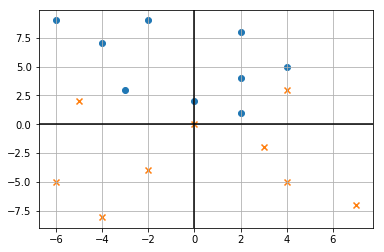

In [44]:
fig3 = plt.figure()
plt.scatter(x2[:9], y2[:9],marker='o')
plt.scatter(x2[9:], y2[9:],marker='x')
plt.axhline(0, color='k')
plt.axvline(0, color='k')
plt.grid(True)
plt.show()

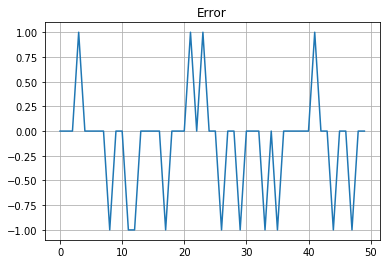

In [45]:
# Grafica de la funcion de error para el ejercicio 2
fig4 = plt.figure()
plt.plot(p2.stats['eVector'][0:50])
plt.title('Error')
plt.grid(True)
plt.show()